In [1]:
import os

# Path to clusTCR repo goes here:
os.chdir('/home/sebastiaan/PhD/Repositories/clusTCR/')

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)

In [24]:
speed = pd.read_csv('./results/method_comparison_speed.tsv', sep='\t')
memory = pd.read_csv('./results/method_comparison_memory.tsv', sep='\t')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

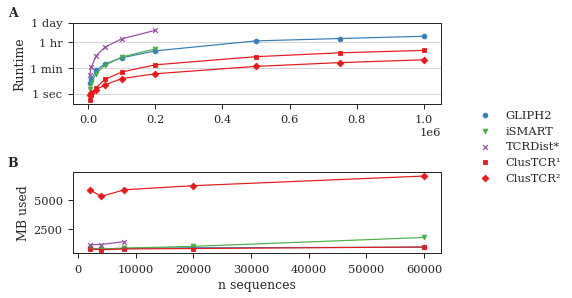

In [115]:
fig, ax = plt.subplots(nrows=2, ncols=1)
colors = sns.color_palette('Set1')

# Algorithmic runtime
df = np.log10(speed.groupby('n_sequences').mean())
x = df.index
ax[0].plot(x, df['GLIPH2'], c=colors[1])
ax[0].scatter(x, df['GLIPH2'], label='GLIPH2', marker='o', c=colors[1])
ax[0].plot(x, df['iSMART'], c=colors[2])
ax[0].scatter(x, df['iSMART'], label='iSMART', marker='v', c=colors[2])
ax[0].plot(x, df['TCRDist*'], c=colors[3])
ax[0].scatter(x, df['TCRDist*'], label='TCRDist*', marker='x', c=colors[3])
ax[0].plot(x, df['ClusTCR¹'], c=colors[0])
ax[0].scatter(x, df['ClusTCR¹'], label='ClusTCR¹', marker='s', c=colors[0])
ax[0].plot(x, df['ClusTCR²'], c=colors[0])
ax[0].scatter(x, df['ClusTCR²'], label='ClusTCR²', marker='D', c=colors[0])

locs = np.log10([1,60,3600,86400])
labels = ["1 sec", "1 min", "1 hr", "1 day"]
ax[0].set_yticks(locs)
ax[0].set_yticklabels(labels)
ax[0].set_ylabel('Runtime')
ax[0].grid(axis='y')

# Memory usage
df = memory
x = df.n_sequences
ax[1].plot(x, df['GLIPH2'], c=colors[1])
ax[1].scatter(x, df['GLIPH2'], label='GLIPH2', marker='o', c=colors[1])
ax[1].plot(x, df['iSMART'], c=colors[2])
ax[1].scatter(x, df['iSMART'], label='iSMART', marker='v', c=colors[2])
ax[1].plot(x, df['TCRDist*'], c=colors[3])
ax[1].scatter(x, df['TCRDist*'], label='TCRDist*', marker='x', c=colors[3])
ax[1].plot(x, df['ClusTCR¹'], c=colors[0])
ax[1].scatter(x, df['ClusTCR¹'], label='ClusTCR¹', marker='s', c=colors[0])
ax[1].plot(x, df['ClusTCR²'], c=colors[0])
ax[1].scatter(x, df['ClusTCR²'], label='ClusTCR²', marker='D', c=colors[0])

ax[1].set_ylabel('MB used')
ax[1].set_xlabel('n sequences')

ax[0].text(-0.15, 1.2, 'A', transform=ax[0].transAxes, fontweight='bold', va='top', ha='right')
ax[1].text(-0.15, 1.2, 'B', transform=ax[1].transAxes, fontweight='bold', va='top', ha='right')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.25, .35))
fig.tight_layout()

fig.savefig('./results/figures/performance_benchmarking.eps', format='eps', bbox_inches='tight')

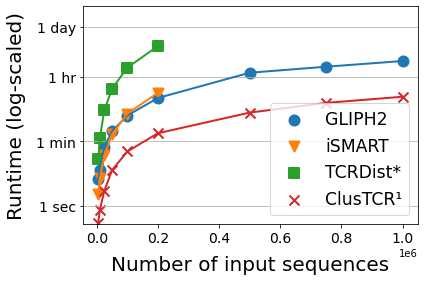

In [27]:
fig, ax = plt.subplots()

methods = speed.columns[:-1]
n_seq = speed[speed.columns[-1]].unique()
colors = ['tab:blue', 'tab:orange', '']
markers = ["o", "v", "s", "x"]

for (method, marker) in zip(methods, markers):
    ax.scatter(n_seq, y = np.log10(speed.groupby(by='n_sequences').mean()[method]), 
               marker = marker, 
               s = 100, 
               linewidths = 2,  
               label = method,
               zorder = 1,
              )
    ax.plot(n_seq, np.log10(speed.groupby(by='n_sequences').mean()[method]), 
            alpha = 1, 
            lw = 2,
            zorder = 2)

# ax.set_title('Speed of TCR clustering methods', fontsize = 32, y=1.04)
ax.set_xlabel('Number of input sequences', fontsize = 20, labelpad = 10)
ax.set_ylabel('Runtime (log-scaled)', fontsize = 20, labelpad = 10)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.legend(fontsize = 'xx-large')

locs = np.log10([1,60,3600,86400])
labels = ["1 sec", "1 min", "1 hr", "1 day"]
plt.ylim((-0.5,5.5))
plt.yticks(ticks=locs, labels=labels)
plt.grid(axis='y')

# fig.savefig('results/figures/method_comparison_speed_log.eps', format='eps')